
Liver Cirrhosis Stage Detection - Machine Learning Project
----------------------------------------------------------
This project predicts the histologic stage of liver cirrhosis (Stage 1, 2, or 3)
using patient clinical and biochemical data from the Mayo Clinic study.

Models Compared:
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
- XGBoos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('liver_cirrhosis.csv')
print("First few rows of the dataset:")
print(df.head(), "\n")

First few rows of the dataset:
   N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      2

In [3]:
# Fill remaining missing values (numeric with median)
df = df.fillna(df.median(numeric_only=True))

In [54]:
# Encode categorical variables
label_cols = ['Platelets', 'Prothrombin', 'Ascites', 'Hepatomegaly', 'Spiders', 'Bilirubin', 'Edema']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Ensure all remaining numeric columns have no missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [46]:
# Features & Target
X = df.drop(columns=['Stage'])
y = df['Stage']

# Map target values from [1,2,3] → [0,1,2] for ML compatibility
y = y.map({1: 0, 2: 1, 3: 2})

In [55]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [56]:
results = {}  # to store performance reports

# ---- Random Forest ----
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
results['Random Forest'] = classification_report(y_test, y_pred_rf, output_dict=True)




Random Forest Results:
[[2334  108   44]
 [  64 2452   48]
 [  26   53 2371]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2486
           1       0.94      0.96      0.95      2564
           2       0.96      0.97      0.97      2450

    accuracy                           0.95      7500
   macro avg       0.95      0.95      0.95      7500
weighted avg       0.95      0.95      0.95      7500



In [57]:
# ---- Logistic Regression ----
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

print("\nLogistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
results['Logistic Regression'] = classification_report(y_test, y_pred_lr, output_dict=True)



Logistic Regression Results:
[[1576  540  370]
 [ 807 1104  653]
 [ 315  438 1697]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.61      2486
           1       0.53      0.43      0.48      2564
           2       0.62      0.69      0.66      2450

    accuracy                           0.58      7500
   macro avg       0.58      0.59      0.58      7500
weighted avg       0.58      0.58      0.58      7500



In [58]:
# ---- XGBoost ----
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
results['XGBoost'] = classification_report(y_test, y_pred_xgb, output_dict=True)



XGBoost Results:
[[2372   85   29]
 [  55 2468   41]
 [  25   49 2376]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2486
           1       0.95      0.96      0.96      2564
           2       0.97      0.97      0.97      2450

    accuracy                           0.96      7500
   macro avg       0.96      0.96      0.96      7500
weighted avg       0.96      0.96      0.96      7500



In [59]:
# ---- SVM ----
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Classifier Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
results['SVM'] = classification_report(y_test, y_pred_svm, output_dict=True)



SVM Classifier Results:
[[2007  358  121]
 [ 301 2048  215]
 [ 164  192 2094]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2486
           1       0.79      0.80      0.79      2564
           2       0.86      0.85      0.86      2450

    accuracy                           0.82      7500
   macro avg       0.82      0.82      0.82      7500
weighted avg       0.82      0.82      0.82      7500




===== Model Comparison (Accuracy) =====
Random Forest: 0.9543
Logistic Regression: 0.5836
XGBoost: 0.9621
SVM: 0.8199


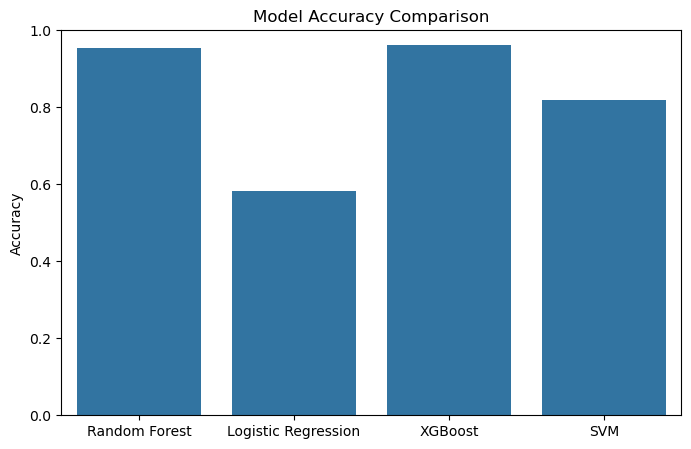

In [60]:

# ==============================
# Step 5: Model Comparison
# ==============================
print("\n===== Model Comparison (Accuracy) =====")
for model_name, report in results.items():
    print(f"{model_name}: {report['accuracy']:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=[r['accuracy'] for r in results.values()])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()